In [1]:
#Import Libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
sns.set()

In [2]:
#Set working Directory
os.chdir("C:/Users/Aurangzeb Alam/Desktop/Shaquib Dataset/Regression")

In [3]:
#Check the working Directory
os.getcwd()

'C:\\Users\\Aurangzeb Alam\\Desktop\\Shaquib Dataset\\Regression'

In [4]:
#Load the Data
Dataset = pd.read_csv("2008_swing_states.csv")

In [5]:
#top 5 head of the data
Dataset.head()

,state,county,total_votes,dem_votes,rep_votes,dem_share
0,PA,Erie County,127691,75775,50351,60.08
1,PA,Bradford County,25787,10306,15057,40.64
2,PA,Tioga County,17984,6390,11326,36.07
3,PA,McKean County,15947,6465,9224,41.21
4,PA,Potter County,7507,2300,5109,31.04


In [6]:
#Convert caegorical into numerical
Dataset.state = pd.Categorical(Dataset.state)
Dataset["state"] = Dataset.state.cat.codes

In [7]:
Dataset.head()

,state,county,total_votes,dem_votes,rep_votes,dem_share
0,2,Erie County,127691,75775,50351,60.08
1,2,Bradford County,25787,10306,15057,40.64
2,2,Tioga County,17984,6390,11326,36.07
3,2,McKean County,15947,6465,9224,41.21
4,2,Potter County,7507,2300,5109,31.04


In [8]:
#make a copy of Dataset
Dataset1 = Dataset.copy()

In [9]:
#Drop unwanted column
Dataset1.drop(["county"], axis=1, inplace=True)

In [10]:
#Head
Dataset1.head()

,state,total_votes,dem_votes,rep_votes,dem_share
0,2,127691,75775,50351,60.08
1,2,25787,10306,15057,40.64
2,2,17984,6390,11326,36.07
3,2,15947,6465,9224,41.21
4,2,7507,2300,5109,31.04


In [11]:
#Columns
Dataset.columns

Index(['state', 'county', 'total_votes', 'dem_votes', 'rep_votes',
       'dem_share'],
      dtype='object')

In [12]:
#Numerical columns
numerical_columns = Dataset.select_dtypes(include=[np.number]).columns.tolist()
numerical_columns

['state', 'total_votes', 'dem_votes', 'rep_votes', 'dem_share']

# Missing Value

In [13]:
#Missing value Analysis
missing_value = pd.DataFrame(Dataset1.isnull().sum())
missing_value

,0
state,0
total_votes,0
dem_votes,0
rep_votes,0
dem_share,0


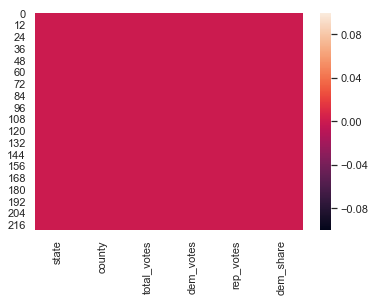

In [14]:
#Plot the histogram to show missing values
sns.heatmap(Dataset.isnull(),cbar=True)

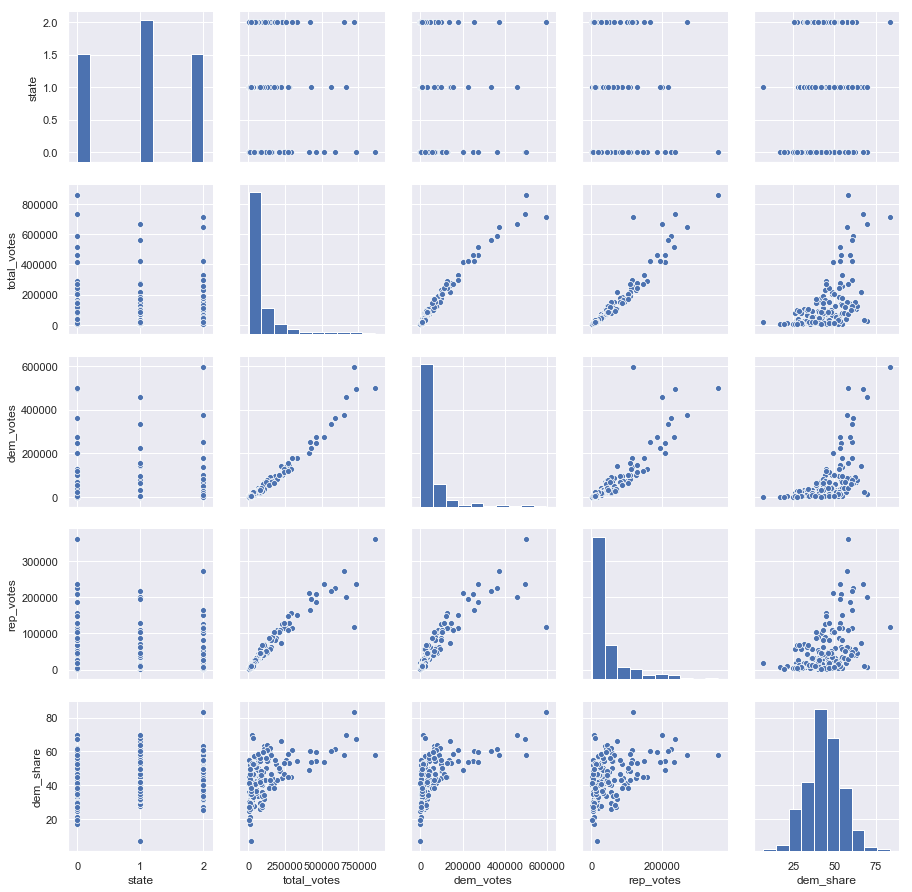

In [15]:
#Plot paiwise relationship in Dataset1
sns.pairplot(Dataset)

# Outliers

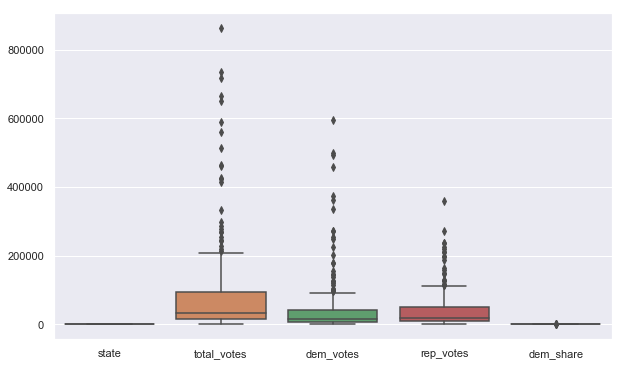

In [16]:
#plot boxplot to see the outliers
plt.figure(figsize=(10,6))
sns.boxplot(data=Dataset1)

In [17]:
# Looping over all continuous variables to detect and remove Outliers
for i in numerical_columns:
    # Getting 75 and 25 percentile of variable "i"
    q75, q25 = np.percentile(Dataset1[i], [75,25])
    # Calculating Interquartile range
    iqr = q75 - q25
    
    # Calculating upper extream and lower extream
    minimum = q25 - (iqr*1.5)
    print(minimum)
    maximum = q75 + (iqr*1.5)
    print(maximum)
    
    # Replacing all the outliers value to NA
    Dataset1.loc[Dataset1[i]< minimum,i] = np.nan
    Dataset1.loc[Dataset1[i]> maximum,i] = np.nan

-3.0
5.0
-101932.0
213986.0
-46590.75
94551.25
-52968.25
112823.75
18.36875
68.85875000000001


In [18]:
#Missing values
missing_values1= Dataset1.isnull().sum().sum()
missing_values1

81

In [19]:
Dataset1 = Dataset1.fillna(Dataset1.mean())

In [20]:
#Missing values
missing_values1= Dataset1.isnull().sum().sum()
missing_values1

0

# Feature Selection

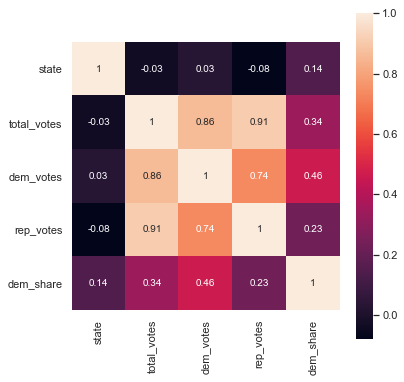

In [21]:
plt.figure(figsize=(6,6))
sns.heatmap(Dataset1.corr(),square=True,annot=True)

In [22]:
corr = Dataset1.corr()
corr_target = abs(corr["dem_share"])
relevant_features = corr_target[corr_target<0.75]
relevant_features_columns = relevant_features[:][:]
relevant_features_columns

state          0.143839
total_votes    0.338279
dem_votes      0.462585
rep_votes      0.230871
Name: dem_share, dtype: float64

In [23]:
#Split Data into independent and dependent
X = Dataset1[["state","total_votes","dem_votes","rep_votes"]]
y = Dataset1["dem_share"]

In [24]:
#Split data into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)

# Regression

In [25]:
from sklearn.linear_model import LinearRegression
Linear_Regression = LinearRegression()
Linear_Regression.fit(X_train,y_train)
prediction = Linear_Regression.predict(X_test)
prediction

array([38.89432622, 45.96325355, 42.87193993, 43.4054052 , 45.96325355,
       43.22659852, 43.8409002 , 52.81775122, 39.19654141, 42.99202751,
       43.15483026, 42.33852505, 49.78847708, 42.59079993, 41.95759606,
       42.4055109 , 33.35800989, 41.88375311, 39.76611626, 42.93169673,
       39.83761658, 39.3374935 , 42.4055109 , 43.52633305, 51.80593443,
       43.59713831, 42.31489246, 39.52721111, 41.76632962, 40.21491176,
       42.84779175, 43.88422264, 45.89053277, 40.15503705, 57.28546339,
       44.04112393, 41.40435598, 41.29172062, 39.41336098, 43.65741722,
       43.21080815, 42.4055109 , 44.4144555 , 39.56677436, 43.66396914,
       42.89235348, 60.52509035, 46.966944  , 43.16442581, 34.65445057,
       53.0527845 , 43.59992511, 44.11409622, 41.1989705 , 57.70613525,
       51.59873284, 33.60411888, 46.08374185, 50.38554303, 43.5456582 ,
       58.70263067, 42.49816411, 41.81050175, 53.53302599, 40.06470929,
       41.23170042, 41.93103743])

In [26]:
#Coefficient of Linear Regression
Linear_Regression.coef_

array([ 1.77887132e+00, -8.58426800e-07,  2.99715544e-04, -1.13833676e-04])

In [27]:
#Intercept value
Linear_Regression.intercept_

39.49576232190708

In [28]:
#Publish the accuracy metrics
from sklearn import metrics
metrics.mean_absolute_error(y_test, prediction) #Mean Absolute Error

6.951893516591884

In [29]:
RMSE = np.sqrt(metrics.mean_squared_error(prediction,y_test))
print("RMSE for Testing set:",RMSE)

RMSE for Testing set: 8.652128839894862


In [30]:
#the command .score(X_test,y_test) used to determine the accuracy
accuracy_train=Linear_Regression.score(X_train,y_train)
print("Accuracy for Training set:",accuracy_train)

Accuracy for Training set: 0.22290115655901113


In [31]:
# the command .score(X_test,y_test) to determine his model accuracy
accuracy_test=Linear_Regression.score(X_test,y_test)
print ("Accuracy for Testing set :",accuracy_test)

Accuracy for Testing set : 0.2569218911569596


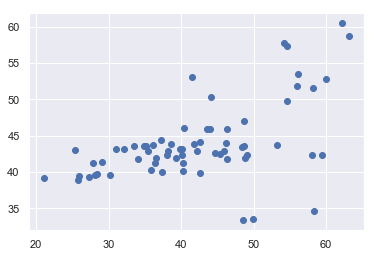

In [32]:
plt.scatter(y_test,prediction)

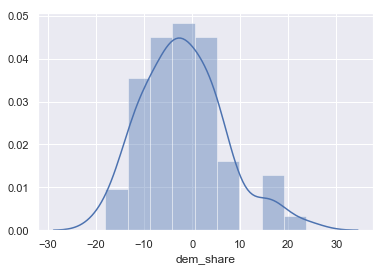

In [33]:
#Plot the residual error
sns.distplot(y_test - prediction)